<a href="https://colab.research.google.com/github/KaueAbbe/Projeto-Estude_Python/blob/main/Estude%20Machine%20Learning/Previsao/Regress%C3%A3o_Classificacao_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color = 'darkblue' size = 8>Machine Learning: Regressão, Classifiação e Clustering</font>

#Sobre o Autor e o Notebook
Neste notebook contém estudos a respeitos destas 3 técnicas de machine Learning utilizando o Scikit-Learn. Este é um notebook com fins educacionais e que deverá ser atualizado com links, informações e atualizações de modelo. 

A base de dados que será utilizada neste notebook se encontra no link abaixo:
* [DADOS NO GITHUB](https://https://github.com/KaueAbbe/Projeto-Estude_Python/tree/main/Estude%20Machine%20Learning/dados)

Este notebook possuirá diversas referencias, sendo uma delas o curso de machine learning da Alura. No entanto o autor tem suas informações detalhadas abaixo.

<font size =4> **Autor:** Kaue Hermann Abbehausen</font>

<font size =4> **Linkedin:** https://www.linkedin.com/in/kaue-abbehausen-5b1922165/</font>

<font size = 5 color = 'black'> Importante: </font>
**É importante notar que neste notebook não se encontram informações explícitas de exploração dos dados, análises explorátios, nem correção dos dados, que são passos importantíssimos na hora de desenvolver o modelo. Isto se deve ao fato que o foco aqui é entender como escolher um modelo, quais detalhes de modelo temos que nos ater e como criar o modelo**

# Sobre Machine Learning

Machine learning é uma forma de passar dados à máquina de forma a fazer ela aprender como obter resultados com esses dados. No processo é criado um modelo zerado que irá receber os dados e o aprendizado, que pode ser uma equação estatística (exemplo: regressão).

Existem duas formas de fazer um modelo de Machine Learning:
* **Supervisionado:** Há conhecimento dos resultados targets (desejados) quando se cria o modelo. Assim sabemos qual deveria ser o resultado do modelo. 
* **Não supervisionado:** Não há conhecimento dos resultados targets. A máquina irá organizar os grupos e padrões de forma sozinha. Neste modelo devemos ter uma cautela maior ao avaliarmos os resultados, já que não sabemos os resultados targets.

Em ambos os modelos precisamos ter uma forma de quantificar o quão bom é o nosso modelo, e queremos sempre o melhor modelo. Logo precisamos, além de avaliar o modelo compará-lo e atualiza-lo.

Abaixo segue as técnicas para realizar Machine Learning.
[Scikit-learn](https://scikit-learn.org/stable/)

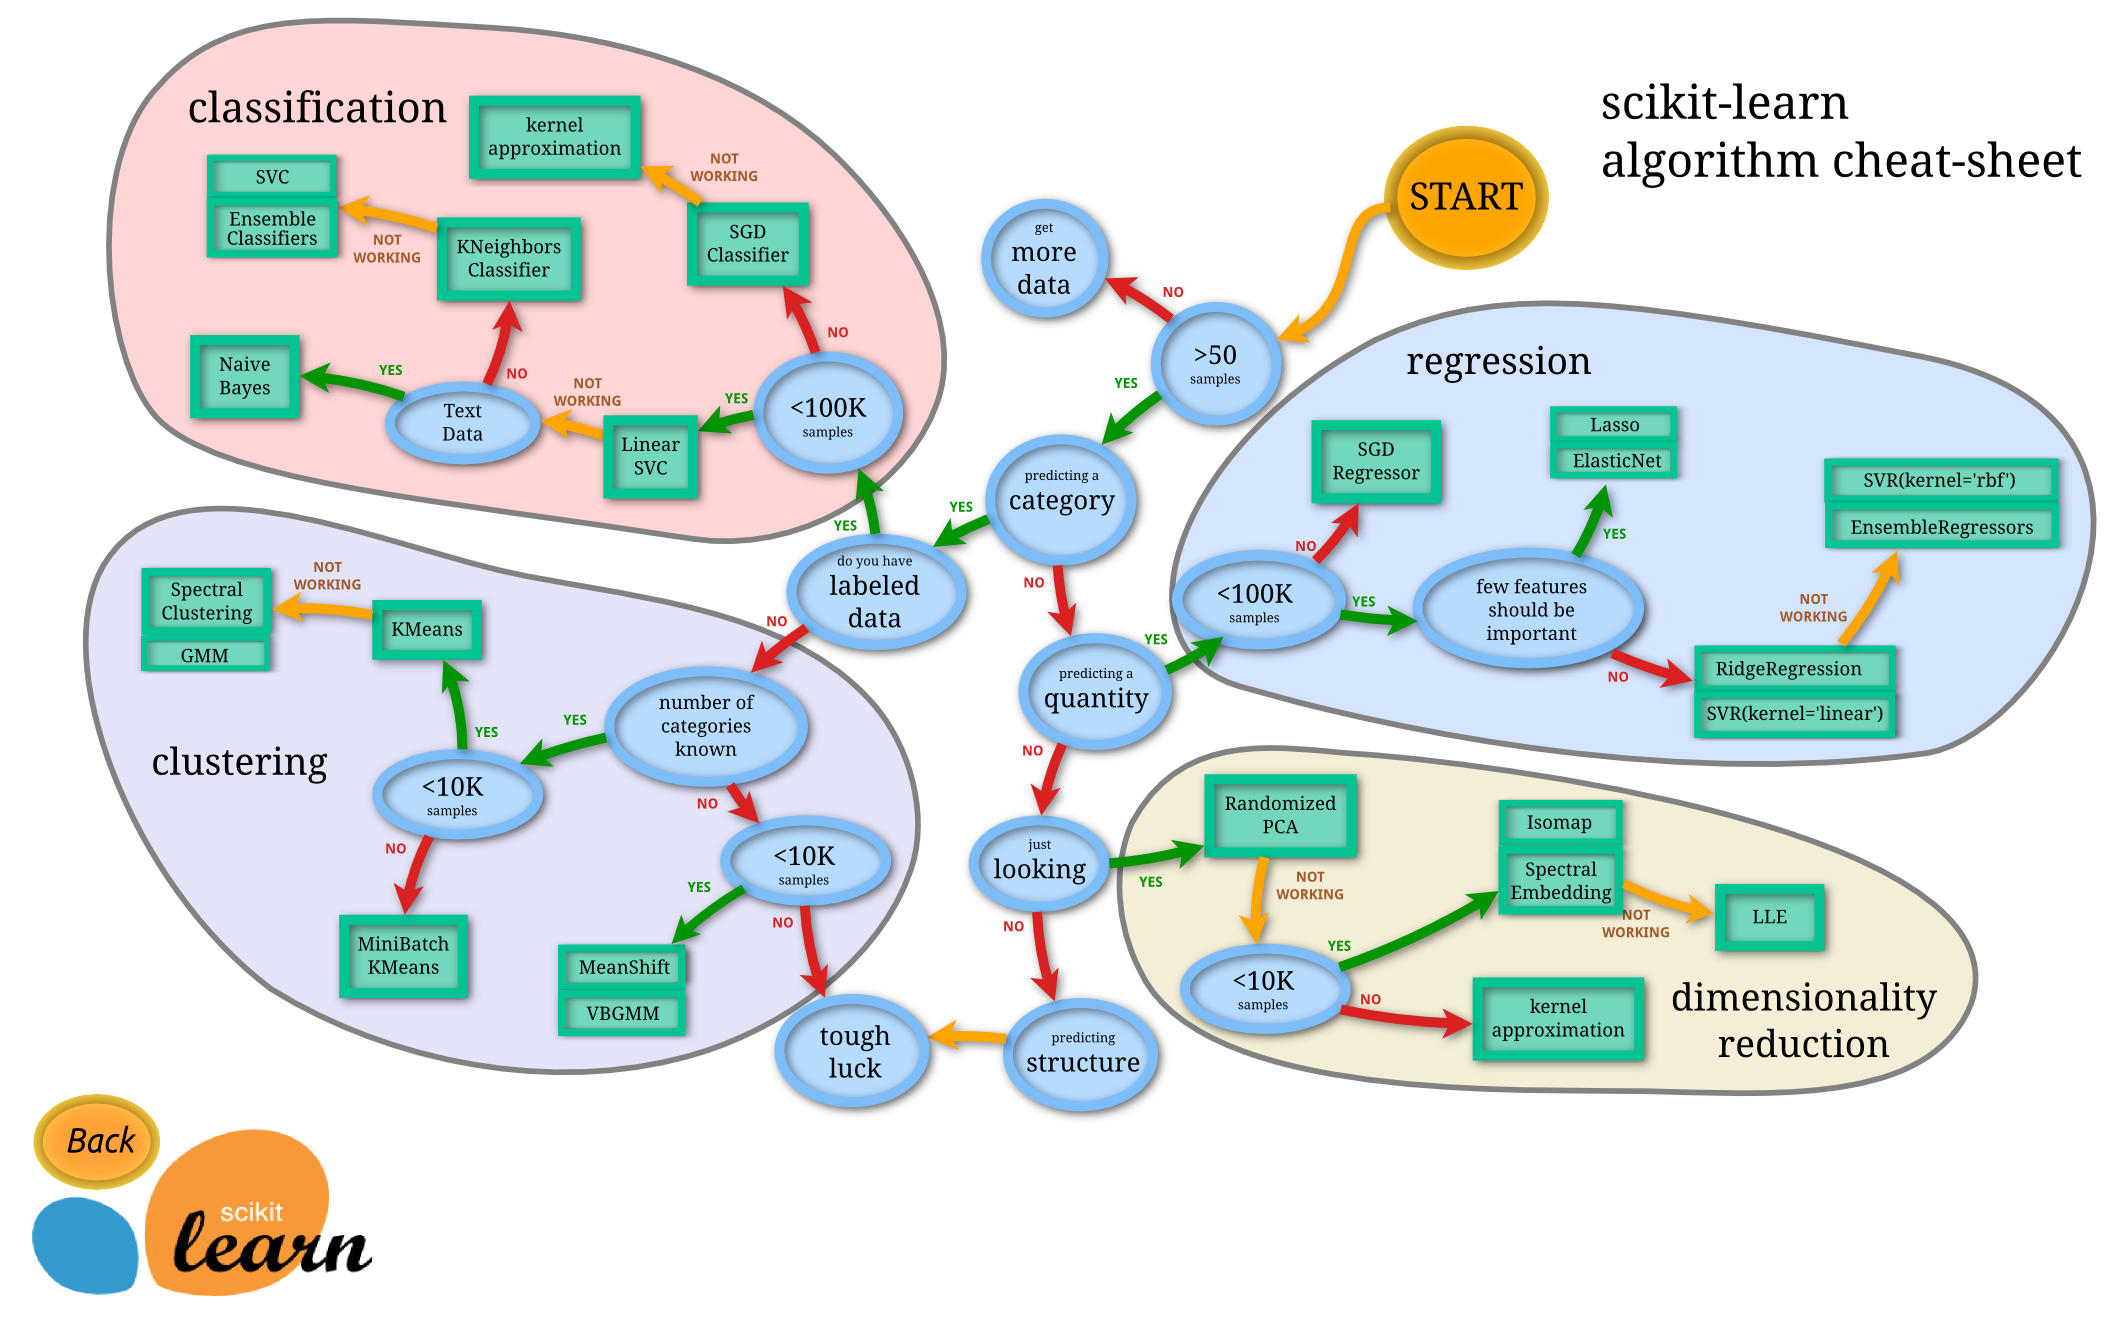

#Importandos Dados

In [1]:
import pandas as pd
import sklearn as sk

In [2]:
diabetes = 'https://raw.githubusercontent.com/KaueAbbe/Projeto-Estude_Python/main/Estude%20Machine%20Learning/dados/diabetes.csv'
diabetes = pd.read_csv(diabetes)

In [3]:
diabetes.head()

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,testado_positivo
1,1,85,66,29,0,26.6,0.351,31,testado_negativo
2,8,183,64,0,0,23.3,0.672,32,testado_positivo
3,1,89,66,23,94,28.1,0.167,21,testado_negativo
4,0,137,40,35,168,43.1,2.288,33,testado_positivo


In [4]:
batimentos = 'https://raw.githubusercontent.com/KaueAbbe/Projeto-Estude_Python/main/Estude%20Machine%20Learning/dados/batimentos%20cardiacos.csv'
batimentos = pd.read_csv(batimentos)
batimentos.head()

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796
3,55.778712,90.491878,12.622969,114.239779
4,53.790400,84.129280,11.032320,107.184063


In [5]:
colesterol = 'https://raw.githubusercontent.com/KaueAbbe/Projeto-Estude_Python/main/Estude%20Machine%20Learning/dados/colesterol.csv'
colesterol = pd.read_csv(colesterol)
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


# Primeiro modelo - Classificação : Diabetes

É importante que separamos os dados em dois grupos: Grupo de treino e grupo de teste.

* **Grupo de Treino:** Dados utilizados para treinar o nosso modelo. É este grupo que o modelo utilizará para aprender.
* **Grupo de Teste:** Dados utilizados para quantificar a precisão do nosso modelo

Para separar os dados utilizados o método *train_test_split*. A separação é feita de forma randômica, mas utilizamos um método para fixar a randomização, que é aplicar uma semente (seed).

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
diabetes.head()

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,testado_positivo
1,1,85,66,29,0,26.6,0.351,31,testado_negativo
2,8,183,64,0,0,23.3,0.672,32,testado_positivo
3,1,89,66,23,94,28.1,0.167,21,testado_negativo
4,0,137,40,35,168,43.1,2.288,33,testado_positivo


## Separando os dados

Para separar os dados também separamos por variáveis independentes e variável dependente. O x carrega todas as variáveis independentes, enquanto o y carrega a variável dependente, que é a variável target.

In [8]:
x = diabetes.drop('resultado', axis = 1)
x.head()

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
y = diabetes['resultado']
y.head()

0    testado_positivo
1    testado_negativo
2    testado_positivo
3    testado_negativo
4    testado_positivo
Name: resultado, dtype: object

In [10]:
SEED = 4121988
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25, random_state = SEED)

<font size = 5 color= 'green'> Sobre Classificação</font>

O nossos dados targets (resultado) é do tipo qualitativo. Os resultados únicos que temos são: positivo ou negativo. Neste tipo de situação o que estamos buscando fazer é classificar um paciente como positivo ou negativo para diabetes, ou seja, estamos classificando nosso paciente. 

Uma forma usada para este tipo de dado (dado qualitativo) é transformar ele em 0 ou 1. Atribuindo 0 negativo e 1 para positivo, por escolha. A classificação segue uma ideia semelhante a regressão, em que o valor da variável independente levar a um valor da variável dependente, e a depender do valor será classificado como 0 ou 1. No entanto, a regressão não é linear e sim é uma regressão logística, seguindo a equação:

$f(x) = \frac{1}{1 + e^x}$



##Criando o modelo

O modelo que escolhi para utilizar é o Decision Tree. Na criação do modelo Decision Tree podemos pedir o maior número de profundidade (max_depth), que vai informar o quão detalhado queremos que o modelo seja.

A árvore de decisão é um modelo muito bom para podermos visualizar as razões pelo qual o treino tomou certas decisões.

https://scikit-learn.org/stable/modules/tree.html#classification

* .fit() treina o modelo com os dados de treino
* .score() calcular a acurácia do nosso modelo com os dados de teste

In [11]:
from sklearn.tree import DecisionTreeClassifier

clf_arvore = DecisionTreeClassifier( max_depth = 3)

In [12]:
clf_arvore.fit(x_treino,y_treino)

DecisionTreeClassifier(max_depth=3)

In [13]:
clf_arvore.score(x_teste, y_teste)

0.7239583333333334

<font size = 5 color = 'darkgreen'>  Classificador Dummy</font>

O classificador Dummy é um classificador com baixa precisão, usado como base para podermos avaliar o nosso modelo criado. É importante que o Dummy tenha acurácia menor que o nosso modelo 

In [14]:
from sklearn.dummy import DummyClassifier

In [15]:
clf_dummy = DummyClassifier(strategy = 'most_frequent')
clf_dummy.fit(x_treino, y_treino)
clf_dummy.score(x_teste, y_teste)

0.6770833333333334

### Outros modelos
Abaixo seguem outros modelos de classificação para servir de base e para fins de estudos e conhecimento

#### Ridge Regression and Classification


In [16]:
from sklearn.linear_model import RidgeClassifier
clf_rc = RidgeClassifier(random_state=SEED)
clf_rc.fit(x_treino,y_treino)
clf_rc.score(x_teste, y_teste)

0.7447916666666666

#### Support Vector Machine

In [17]:
from sklearn.svm import SVC
clf_svc = SVC(random_state=SEED)
clf_svc.fit(x_treino,y_treino)
clf_svc.score(x_teste, y_teste)

0.7395833333333334

### Continuando com o Tree Classifier

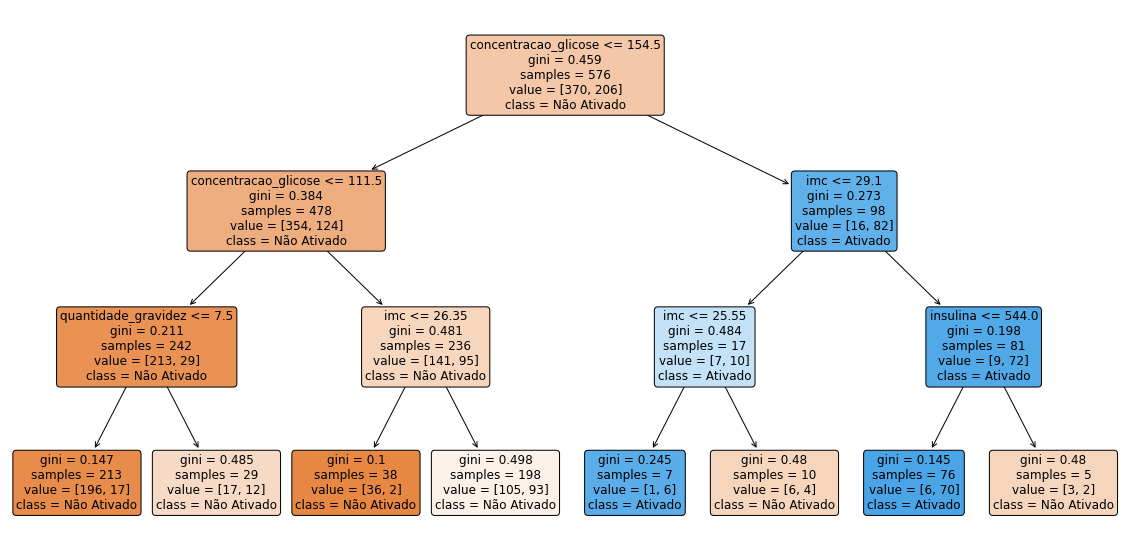

In [18]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20,10))
tree.plot_tree(clf_arvore, ax=ax, fontsize = 12, rounded = True,
               filled = True, feature_names = x_treino.columns,
               class_names = ['Não Ativado', 'Ativado'])

plt.show()

# Segundo modelo - Regressão : Batimentos Cardíacos

Na regressão queremos aprender uma curva (um padrão) que consiga devolver como responder uma resposta dentro de um conjunto infinito de possibilidades. Desta vez não se trata de uma classificar em 1 ou 0, e sim obter um número específico para a situação apresentada. 

Quanto aos passos de separar, treinar e avaliar não há mudanças. As mudanças estão no tipo de modelo utilizado, e por consequência na estatística. 

In [19]:
batimentos.head()

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796
3,55.778712,90.491878,12.622969,114.239779
4,53.790400,84.129280,11.032320,107.184063


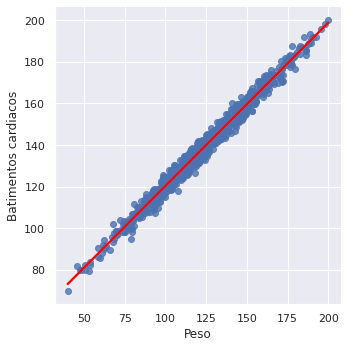

In [22]:
import seaborn as sns
sns.set()
#plt.figure(figsize =(100,50))
sns.lmplot(x = 'Peso', y = 'Batimentos cardiacos', data = batimentos, line_kws ={'color':'red'})
plt.show()

No gráfico acima vemos que quanto maior o peso da pessoa maior é o valor do batimento cardíco, e há um padrão linear (curva vermelha).

## Separando os dados

In [24]:
x = batimentos.drop('Batimentos cardiacos', axis = 1)
x.head()

,Idade,Peso,Horas de atividade
0,44.247295,53.591343,3.397836
1,81.427930,172.569375,33.142344
2,50.807130,74.582817,8.645704
3,55.778712,90.491878,12.622969
4,53.790400,84.129280,11.032320


In [25]:
y = batimentos['Batimentos cardiacos']
y.head()

0     82.307425
1    179.045377
2    103.522796
3    114.239779
4    107.184063
Name: Batimentos cardiacos, dtype: float64

In [27]:
SEED = 4500
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state = SEED)

## Criando o Modelo de regressão: 

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
rgs = LinearRegression()

In [30]:
rgs.fit(x_treino, y_treino)

LinearRegression()

In [31]:
rgs.score(x_teste, y_teste)

0.9869381291237127

# Modelo 3 - Clustering: Colesterol

O Clustering faz parte do tipo de modelo **Não supervisionado**.
Este algoritmo funciona separando os dados em grupos, avaliando as semelhanças e as diferenças. Nosso papel é dizer quantos grupos serão criados.

In [32]:
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


## Importando o KMeans e criando uma variável

É importante passar ao kmeans o número de grupos, dados por n_cluesters. 
* **Vantagens:** Todos os dados são pensando em refência a um centro calculado.
* **Desvantagens:** Todos os objetivos são forçados a pertencer a um grupo específico

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =  2, random_state = 9)

## Avaliando dados / Gráfico

In [37]:
colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         303 non-null    int64  
 1   genero                        303 non-null    int64  
 2   tipo_dor_peito                303 non-null    int64  
 3   pressao_sanguinea_repouso     303 non-null    int64  
 4   acucar_jejum                  303 non-null    int64  
 5   resultado_eletrocardio        303 non-null    int64  
 6   freq_cardio_max               303 non-null    int64  
 7   angina_exercicio              303 non-null    int64  
 8   depressao_induzida_exercicio  303 non-null    float64
 9   inclinacao                    303 non-null    int64  
 10  num_princ_vasos               303 non-null    object 
 11  thal                          303 non-null    object 
 12  diag_doenca_cardiaca          303 non-null    int64  
 13  coles

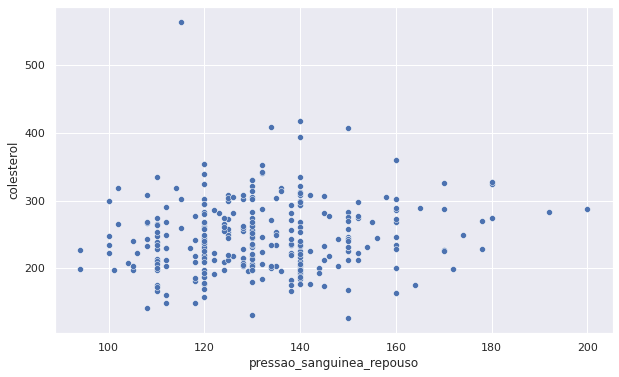

In [46]:
ax = sns.scatterplot(x = 'pressao_sanguinea_repouso', y = 'colesterol', data = colesterol)
ax.figure.set_size_inches(10,6)
ax=ax

## Seperando os dados e criando o modelo

Neste caso, como é não supervisionado não temos a variável y. Vamos colocar todos os dados em x.

In [38]:
x = colesterol.select_dtypes('int64')

In [39]:
kmeans.fit(x)

KMeans(n_clusters=2, random_state=9)

In [40]:
kmeans.labels_

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [41]:
colesterol['cluesters'] = kmeans.labels_
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol,cluesters
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233,1
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286,0
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229,1
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250,1
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204,1


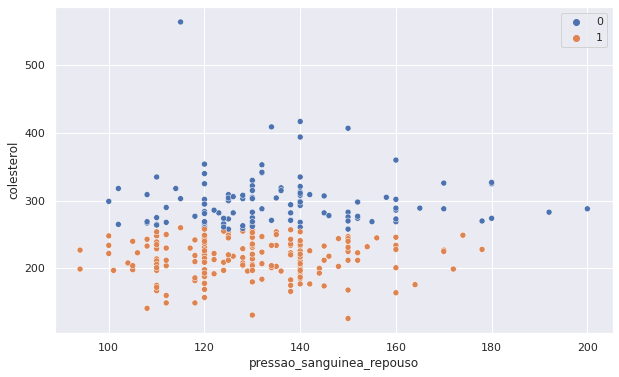

In [47]:
ax = sns.scatterplot(x='pressao_sanguinea_repouso', y='colesterol', data= colesterol, hue = kmeans.labels_)
ax.figure.set_size_inches(10,6)

In [43]:
colesterol.groupby('cluesters')['colesterol'].mean()

cluesters
0    298.963964
1    216.473958
Name: colesterol, dtype: float64